# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.stats as stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\sheary\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


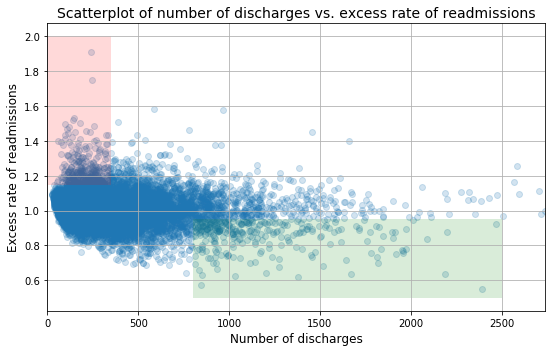

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# My turn

## A. Do you agree with the above analysis and recommendations? Why or why not?

Overall, I don't agree with the above Preliminary report totally. The reasons are as following:

1) Since there is not testing for statistical significance and no correlation coefficient was calculated. Initial analysis was entirely based on plot alone 

2) In the statistical analysis - There was no "Hypothesis test" conducted and hospital capacity was grouped only into two: group with number of discharges <100 and >1000. So it is obivous that a big chunk of data between 100 and 1000 were not used and dicarded.

3) Conclusions were not back up with a solid previous statistical analysis.  In this section, small capacity hospitals was defined as hospitals with number of discharges <300. However,   In the statistics part, small hospital capacity  was defined as number of discharges <100, which is inconsistent and confusing. 

The statistical confirmation steps are as following: 

### A.1 check the Statistics section in  Preliminary Report 

" In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1"
"•In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 "


In [6]:
h_s=clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate','Number of Readmissions']]

In [7]:
Hospital_class=[]
for item in h_s['Number of Discharges']:
  if item <100:
        Hospital_class.append('Small')
  elif item >=100 and item <= 1000:
    Hospital_class.append('Medium')
  else:
    Hospital_class.append('large')              

In [8]:
h_s['Hospital_class']=Hospital_class

C:\Users\sheary\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
Small = h_s[h_s['Hospital_class']=='Small']
Medium= h_s[h_s['Hospital_class']=='Medium']
Large = h_s[h_s['Hospital_class']=='large']

In [10]:
## Since A ratio greater than 1 indicates excess readmissions.
Small_r_c=0
for item in Small['Excess Readmission Ratio']:
    if item>1:
        Small_r_c+=1
print(Small_r_c) 
small_p=Small_r_c/Small.shape[0]
small_mean=Small['Excess Readmission Ratio'].mean()

751


In [11]:
print( 'The mean of excess readmission rate of small hospital is :', small_mean, 'and the excess readmission rate is: ', small_p,)

The mean of excess readmission rate of small hospital is : 1.0226183501683506 and the excess readmission rate is:  0.5918045705279747


In [12]:
Medium_r_c=0
for item in Medium['Excess Readmission Ratio']:
    if item>1:
        Medium_r_c+=1
print(Medium_r_c)
print(Medium_r_c/Medium.shape[0])

4982
0.5059922811293927


In [13]:
Large_r_c=0
for item in Large['Excess Readmission Ratio']:
    if item>1:
        Large_r_c+=1
print(Large_r_c)
large_p=Large_r_c/Large.shape[0]
large_mean=Large['Excess Readmission Ratio'].mean()

206


In [14]:
print( 'The mean of excess readmission of large hospital rate is :', large_mean, 'and the excess readmission rate is: ', large_p,)

The mean of excess readmission of large hospital rate is : 0.9783354211663071 and the excess readmission rate is:  0.4449244060475162


 Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

#### B.1 Setup an appropriate hypothesis test

In [15]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [16]:
print(h_s.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 6 columns):
Number of Discharges          11578 non-null int32
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Hospital_class                11578 non-null object
dtypes: float64(4), int32(1), object(1)
memory usage: 587.9+ KB
None


In [17]:
h_s.corr()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Number of Discharges,1.000000,-0.097398,-0.135163,-0.131091,0.791272
Excess Readmission Ratio,-0.097398,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.135163,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.131091,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,0.791272,0.117600,0.361033,0.330527,1.000000


In [18]:
h_s.describe()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11497.000000,11497.000000,11497.000000,11497.000000
mean,362.909397,1.007504,17.984292,17.865695,63.633731
std,309.176945,0.091964,5.487651,5.240749,59.540296
min,0.000000,0.549500,2.700000,3.900000,11.000000
25%,157.000000,0.952600,16.300000,16.600000,24.000000
50%,280.000000,1.003500,19.000000,19.000000,45.000000
75%,472.750000,1.058100,21.500000,21.400000,82.000000
max,6793.000000,1.909500,32.800000,28.000000,879.000000


In [19]:
h_s_new=h_s

In [20]:
Hospital_class=[]
for item in h_s['Number of Discharges']:
  if 0<item <300:
        Hospital_class.append('Small')
  elif item >=300 and item <= 1000:
    Hospital_class.append('Medium')
  else:
    Hospital_class.append('large')              

In [21]:
h_s['Hospital_class']=Hospital_class

C:\Users\sheary\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
Small = h_s[h_s['Hospital_class']=='Small']
Medium= h_s[h_s['Hospital_class']=='Medium']
Large = h_s[h_s['Hospital_class']=='large']

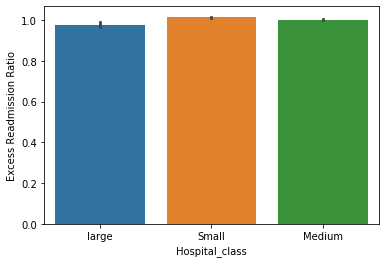

In [23]:
sns.barplot(x=h_s['Hospital_class'],y=h_s['Excess Readmission Ratio'],ci=95,n_boot=10000,data=h_s_new)

### We observed there is difference between the three groups, is it significant?

### B.2 ,B.3, Compute and report the observed significance value (or p-value) &  Report statistical significance for 𝛼 = .01

In [24]:
# Let's check if there is a significant difference between the means of Small and Large hospital
# Null Hyphothesis: Ho: M1 - M2 = 0     # alpha = 0.01
# Alternative Hyphothesis: H1: M1 - M2 > 0
# two-sample t-test

from scipy.stats import ttest_ind

ttest_ind(Small['Excess Readmission Ratio'], Large['Excess Readmission Ratio'],nan_policy= 'omit')


Ttest_indResult(statistic=8.695412386320424, pvalue=4.313008590901734e-18)

In [25]:
ttest_ind(Medium['Excess Readmission Ratio'], Large['Excess Readmission Ratio'],nan_policy= 'omit')

Ttest_indResult(statistic=4.802958914951776, pvalue=1.605729323909613e-06)

#### B4. Discuss statistical significance and practical significance
   There is a significant correlation between hospital capacity (number of discharges) and readmission rates. Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions. Policy recommendations: Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation. Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges. 
  Since the difference between the two groups is small,so we need to consider the practical significane. Herein the pratical significance refer to the following questions: Is it worthful to perform upgrade with small percentage of gain in decreasing readmission ratio?

### B.5 Look at the scatterplot above. 1).What are the advantages and disadvantages of using this plot to convey information?2).Construct another plot that conveys the same information in a more direct manner.


### Answer to B.5.1 : The above scatterplot in 'Preliminary Analysisin' section can only provid limited information.There was no "Hypothesis test" was conducted for hospital capacity and readimission ratio.

C:\Users\sheary\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


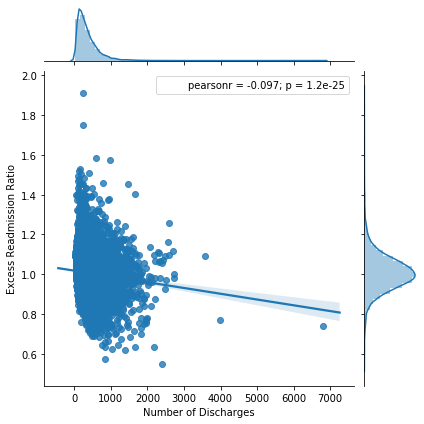

In [26]:
j=sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=h_s, kind='reg')
j.annotate(stats.pearsonr)
plt.show()

### Answer to B5.2. Overall, rate of readmissions is trending down with increasing number of discharges. Based on pearsonr correlation results from the joint plots displayed above, correlation between 'Excess Readmission Ratio' and 'Number of Discharges' is significant. The above statistical analysis and plots convey the same information in a more direct manner.The jointplot above adds an annotation with the correlation coefficient and p-value, a regression line and the kernel density fits for both variables. It is very quick and easy to generate and provides a tremendous amount of information.¶